In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn import datasets
from sklearn.preprocessing import normalize
import pylab

from tsne import *

In [3]:
X, y = datasets.load_digits(return_X_y=True)

In [4]:
res = tsne(X, T=400, l=200)

Sigmas: [ 5.98213702  9.13406836 10.98042699 ...  9.88479788  9.72000943
 10.18701319]
Iteration 1: error 3.2595
Iteration 11: error 3.2595
Iteration 21: error 2.8457
Iteration 31: error 1.5047
Iteration 41: error 1.1512
Iteration 51: error 1.0157
Iteration 61: error 0.945
Iteration 71: error 0.9008
Iteration 81: error 0.8698
Iteration 91: error 0.8473
Iteration 101: error 0.8287
Iteration 111: error 0.8125
Iteration 121: error 0.7982
Iteration 131: error 0.7857
Iteration 141: error 0.7739
Iteration 151: error 0.7617
Iteration 161: error 0.7507
Iteration 171: error 0.7428
Iteration 181: error 0.7358
Iteration 191: error 0.7295
Iteration 201: error 0.7238
Iteration 211: error 0.7187
Iteration 221: error 0.714
Iteration 231: error 0.7097
Iteration 241: error 0.7057
Iteration 251: error 0.702
Iteration 261: error 0.6985
Iteration 271: error 0.6953
Iteration 281: error 0.6922
Iteration 291: error 0.6894
Iteration 301: error 0.6866
Iteration 311: error 0.6841
Iteration 321: error 0.6816
Ite

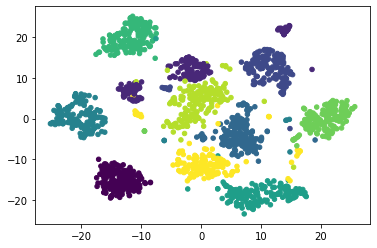

In [5]:
pylab.scatter(res[:, 0], res[:, 1], s=20, c=y)
pylab.show()